In [1]:
# Gọi các thư viện cần thiết để sử dụng
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#-----------
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

**Đọc dữ liệu, quan sát dữ liệu và các đặc trưng thống kê**

In [2]:
# Đọc tập dữ liệu
data= pd.read_csv('Data_Diabetes.csv')
# hiển thị thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               723 non-null    int64  
 1   Glucose                   723 non-null    int64  
 2   BloodPressure             723 non-null    int64  
 3   SkinThickness             723 non-null    float64
 4   Insulin                   723 non-null    float64
 5   BMI                       723 non-null    float64
 6   DiabetesPedigreeFunction  723 non-null    float64
 7   Age                       723 non-null    int64  
 8   Outcome                   723 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.0 KB


In [3]:
# Hiển thị 10 bản ghi đầu
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,126.0,33.6,0.627,50,1
1,1,85,66,29.0,126.0,26.6,0.351,31,0
2,8,183,64,29.0,126.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
5,5,116,74,29.0,126.0,25.6,0.201,30,0
6,3,78,50,32.0,88.0,31.0,0.248,26,1
7,2,197,70,45.0,543.0,30.5,0.158,53,1
8,4,110,92,29.0,126.0,37.6,0.191,30,0
9,10,168,74,29.0,126.0,38.0,0.537,34,1


In [4]:
# Quan sát đặc trưng thống kê
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.869986,121.928077,72.467497,29.147994,142.435685,32.473582,0.474649,33.367911,0.344398
std,3.363438,30.746940,12.256605,9.017616,88.624795,6.891518,0.332530,11.764549,0.475501
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,119.500000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,131.000000,36.600000,0.628000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Nhận xét:**

1. Số lần mang thai trung bình ≈ 4, có người không mang thai lần nào, có người mang thai nhiều nhất là 17 lần
2. Chỉ số Glocose trung bình là ≈ 122, thấp nhất là 44 và cao nhất là 199
3. Huyết áp trung bình là ≈ 72 mmHg, thấp nhất là 30 mmHg và cao nhất là 122 mmHg
4. Mức độ dày da trung bình khoảng 29 mm, thấp nhất là 7 mm và cao nhất là 99 mm
5. Chỉ số BMI trung bình khoảng 32.5, thấp nhất là 18.2 và cao nhất là 67.1
6. Chức năng phả hệ của bệnh tiểu đường khoảng 0.5, thấp nhất là 0.078 và cao nhất là 2.42
7. Tuổi trung bình khoảng 33 tuổi, người có tuổi thấp nhất là 21 tuổi và cao nhất là 81 tuổi

In [5]:
# Hiển thị người có số lượng mang thai nhiều nhất
data[data['Pregnancies']==17]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
150,17,163,72,41.0,114.0,40.9,0.817,47,1


In [6]:
# Hiển thị người có mức độ dày da lớn nhất
data[data['Age']==81]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
431,9,134,74,33.0,60.0,25.9,0.46,81,0


**Xác định và Phân tách biến Độc lập (X) - Phụ thuộc (Y) của tập dữ liệu**

1. Biến độc lập sẽ bao gồm các cột: Pregnancies, Glucose, BloodPressure, SkinThickness,Insulin,BMI, DiabetesPedigreeFunction, Age
2. Biến phụ thuộc là: Outcome

In [7]:
# Tách dữ liệu X và y
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

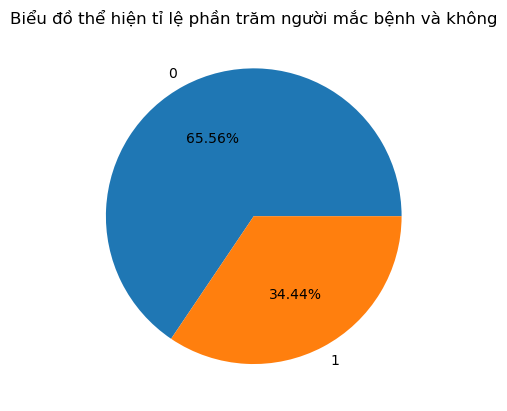

In [8]:
# thống kê số lượng cột Outcome
data_outcome= data['Outcome'].value_counts()
#trực quan hóa
plt.pie(data_outcome.values,labels=data_outcome.index,autopct='%.2f%%')
plt.title("Biểu đồ thể hiện tỉ lệ phần trăm người mắc bệnh và không")
plt.show()

==> Dữ liệu mất cân nhẹ

**Cân bằng dữ liệu bằng phương pháp Smote**

Phân phối ban đầu: Counter({0: 474, 1: 249})


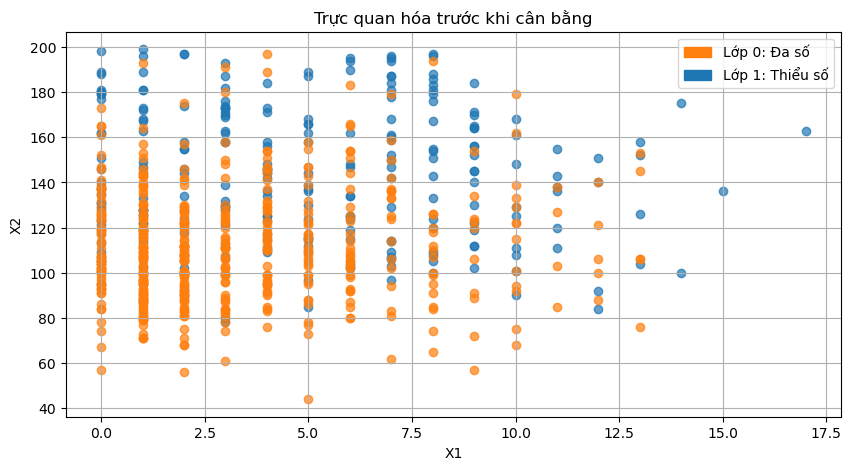

Phân phối sau SMOTE: Counter({1: 474, 0: 474})


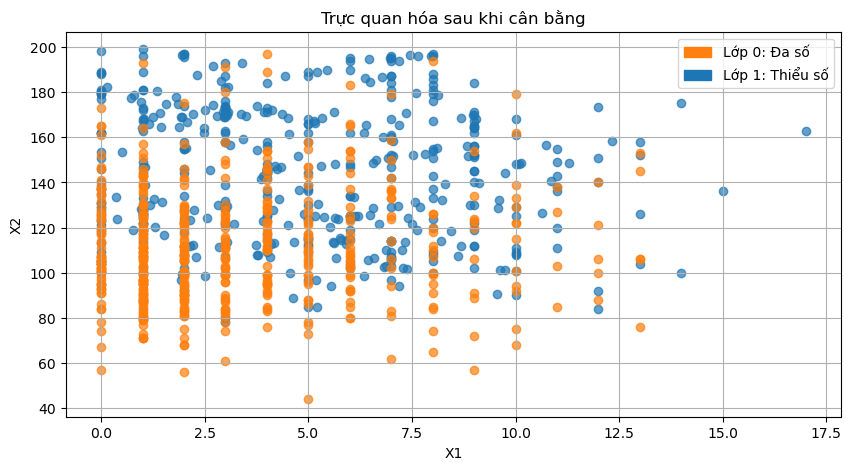

In [10]:
# Đếm phân phối ban đầu
counter = Counter(y)
print("Phân phối ban đầu:", counter)

# Trực quan hóa dữ liệu trước khi cân bằng
blue_patch = mpatches.Patch(color='#FF7F0F', hatch='o', label='Lớp 0: Đa số')
orange_patch = mpatches.Patch(color='#1E77B4', hatch='o', label='Lớp 1: Thiểu số')

plt.figure(figsize=[10, 5])
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f'Lớp {label}', alpha=0.7)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(handles=[blue_patch, orange_patch])
plt.title('Trực quan hóa trước khi cân bằng')
plt.show()

# Áp dụng SMOTE để cân bằng dữ liệu
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Đếm phân phối sau khi cân bằng
counter_resampled = Counter(y_smote)
print("Phân phối sau SMOTE:", counter_resampled)

# Trực quan hóa dữ liệu sau khi cân bằng
plt.figure(figsize=[10, 5])
for label, _ in counter_resampled.items():
    row_ix = np.where(y_smote == label)[0]
    plt.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label=f'Lớp {label}', alpha=0.7)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(handles=[blue_patch, orange_patch])
plt.title('Trực quan hóa sau khi cân bằng')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
# Chia tập train (70%) và tập test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42, shuffle= True)
print('Số lượng mẫu ban đầu:',len(y_smote))
print('Số lượng mẫu tập train:',len(y_train))
print('Số lượng mẫu tập test:',len(y_test))

Số lượng mẫu ban đầu: 948
Số lượng mẫu tập train: 663
Số lượng mẫu tập test: 285


**Xây dựng mô hình KNN cho bài toán phân lớp**

In [12]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN = KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')

#Hiển thị danh sách tham số: Model.get_params()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'distance'}

In [13]:
# Thực hiện huấn luyện với tập dữ liệu train
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')

In [14]:
# Đánh giá độ chính xác model trân tập huấn luyện
acc_train= KNN.score(X_train,y_train)
print('Độ chính xác của mô hình trên tập Train:', round(acc_train*100,2))

Độ chính xác của mô hình trên tập Train: 100.0


In [15]:
# Sử dụng mô hình huấn luyện dự đoán trên tập Test
y_pred= KNN.predict(X_test)
print('Kết quả dự đoán bệnh nhân có mắc bệnh tiểu đường đường hay không')
print("Kết quả cho 20 hành khách hàng đầu tiên:")
print("Predicted labels: ", y_pred[:20])
print("Ground truth    : ", y_test[:20])

Kết quả dự đoán bệnh nhân có mắc bệnh tiểu đường đường hay không
Kết quả cho 20 hành khách hàng đầu tiên:
Predicted labels:  [0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0]
Ground truth    :  [0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0]


In [16]:
# Số lượng mẫu dự đoán đúng
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred, 
                       normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 215.0  / 285


In [17]:
# số lượng mẫu dự đoán sai
print('Tổng số mẫu dự đoán sai:',len(y_test)-acc)

Tổng số mẫu dự đoán sai: 70.0


In [18]:
# Đánh giá độ chính xác của mô hình trên tập Test
acc_test= accuracy_score(y_test,y_pred,normalize=True)
print('Độ chính xác của mô hình trên tập Test:',round(acc_test*100,2))

Độ chính xác của mô hình trên tập Test: 75.44


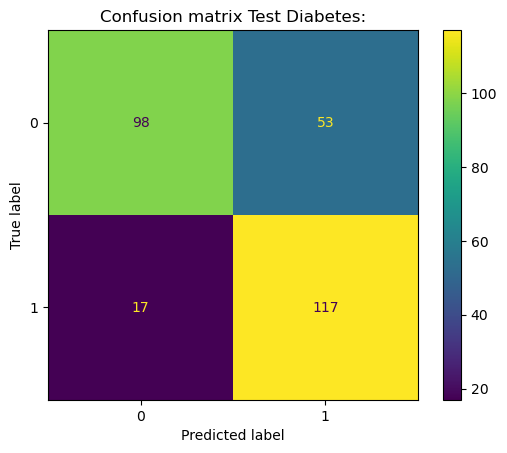

In [19]:
#Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Tính ma trận confusion matrix:
cnf_matrix = confusion_matrix(y_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Diabetes:')
plt.show()

**Nhận xét: Đánh giá trên tập Test**
1. Nhóm người không mắc bệnh mô hình dự đoán đúng được 98 mẫu và sai 53 mẫu
2. Nhóm người mắc bệnh mô hình dự đoán đúng 117 mẫu và sai 17 mẫu

In [22]:
from sklearn.metrics import  precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In kết quả
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.69
Recall: 0.87
F1-Score: 0.77


1. Trong số 170 người được dự đoán mắc bệnh tiểu đường thì có 69% đúng
2. Trong số 134 người thực sự mắc bệnh tiểu đường thì mô hình dự đoán đúng 87%
3. F1-Score cho thấy sự cân bằng giữa Precision và Recall với kết quả 77%

Sử dụng model xây dựng được, dự đoán Bệnh nhân với các thông số như sau có bị mắc 
bệnh tiểu đường hay không? 
1. Pregnancies:  0 
2. Glucose: 128 
3. BloodPressure: 78 
4. SkinThickness: 30 
5. Insulin: 138 
6. BMI: 30 
7. DiabetesPedigreeFunction: 1.18 
8. Age: 23

In [20]:
# Khai báo hồ sơ bệnh nhân
Pregnancies=0
Glucose=128
BloodPressure=78
SkinThickness=30
Insulin=138
BMI=30
DiabetesPedigreeFunction=1.18
Age=23
patient= np.array([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
print('Hồ sơ bệnh nhân:',patient)

Hồ sơ bệnh nhân: [[  0.   128.    78.    30.   138.    30.     1.18  23.  ]]


In [21]:
# dự đoán hồ sơ
patient_predict=KNN.predict(patient)
if patient_predict==0:
    print('Chúc mừng bạn không bị mắc bệnh tiểu đường')
else:
    print('Thật đáng buồn, bạn bị mắc bệnh tiểu đường')

Chúc mừng bạn không bị mắc bệnh tiểu đường
